In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

# trip

In [2]:
trip = pd.read_csv('/home/kyohei/bike_share_data/trip_all.csv')

In [3]:
trip_sub_start = trip[trip['Start Terminal']==69]
trip_sub_end = trip[trip['End Terminal']==69]

In [4]:
trip_sub_start.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
54,5074,216,8/29/2013 21:45,San Francisco Caltrain 2 (330 Townsend),69,8/29/2013 21:49,San Francisco Caltrain 2 (330 Townsend),69,268,Subscriber,94133
71,4668,243,8/29/2013 15:39,San Francisco Caltrain 2 (330 Townsend),69,8/29/2013 15:43,Townsend at 7th,65,489,Subscriber,94107
72,4667,244,8/29/2013 15:39,San Francisco Caltrain 2 (330 Townsend),69,8/29/2013 15:43,Townsend at 7th,65,431,Subscriber,94109
166,4414,393,8/29/2013 12:44,San Francisco Caltrain 2 (330 Townsend),69,8/29/2013 12:50,San Francisco Caltrain 2 (330 Townsend),69,259,Customer,91127
194,4464,425,8/29/2013 13:09,San Francisco Caltrain 2 (330 Townsend),69,8/29/2013 13:16,Townsend at 7th,65,318,Subscriber,94107


In [5]:
trip_sub_start['Start Date'] = trip_sub_start['Start Date'].apply(lambda x:pd.to_datetime(x))

trip_sub_start['Start time hour'] = trip_sub_start['Start Date'].apply(lambda x:datetime.datetime(x.year,x.month,x.day,x.hour))

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [6]:
target = pd.DataFrame(trip_sub_start.groupby('Start time hour').size()).reset_index()
target.rename(columns={0:'count'},inplace=True)

# status

In [7]:
status = pd.read_csv('/home/kyohei/bike_share/data_split_2015/San Francisco_station_status_stid69.csv')

In [8]:
status.head()

,Unnamed: 0,station_id,bikes_available,docks_available,time
0,28900495,69,15,8,9/1/2015 00:00:02
1,28900496,69,15,8,9/1/2015 00:01:02
2,28900497,69,15,8,9/1/2015 00:02:02
3,28900498,69,15,8,9/1/2015 00:03:03
4,28900499,69,15,8,9/1/2015 00:04:02


In [9]:
import datetime
status['time'] = status['time'].apply(lambda x:pd.to_datetime(x))

status['minute'] = status['time'].apply(lambda x:x.minute)

status['start_time_hour'] = status['time'].apply(lambda x:datetime.datetime(x.year,x.month,x.day,x.hour,x.minute))

In [10]:
status_minute_0 = status[status.minute==0]

In [11]:
status_minute_0.head()

,Unnamed: 0,station_id,bikes_available,docks_available,time,minute,start_time_hour
0,28900495,69,15,8,2015-09-01 00:00:02,0,2015-09-01 00:00:00
60,28900555,69,14,9,2015-09-01 01:00:02,0,2015-09-01 01:00:00
120,28900615,69,15,8,2015-09-01 02:00:02,0,2015-09-01 02:00:00
180,28900675,69,15,8,2015-09-01 03:00:02,0,2015-09-01 03:00:00
240,28900735,69,15,8,2015-09-01 04:00:03,0,2015-09-01 04:00:00


In [12]:
status_yesterday = pd.concat([status_minute_0[['station_id','time','start_time_hour']],status_minute_0.shift(1)[['bikes_available','docks_available']]],axis=1)

In [13]:
status_yesterday.head()

,station_id,time,start_time_hour,bikes_available,docks_available
0,69,2015-09-01 00:00:02,2015-09-01 00:00:00,NaN,NaN
60,69,2015-09-01 01:00:02,2015-09-01 01:00:00,15.0,8.0
120,69,2015-09-01 02:00:02,2015-09-01 02:00:00,14.0,9.0
180,69,2015-09-01 03:00:02,2015-09-01 03:00:00,15.0,8.0
240,69,2015-09-01 04:00:03,2015-09-01 04:00:00,15.0,8.0


In [14]:
status_yesterday.dropna(inplace=True)

In [15]:
status_yesterday.head()

,station_id,time,start_time_hour,bikes_available,docks_available
60,69,2015-09-01 01:00:02,2015-09-01 01:00:00,15.0,8.0
120,69,2015-09-01 02:00:02,2015-09-01 02:00:00,14.0,9.0
180,69,2015-09-01 03:00:02,2015-09-01 03:00:00,15.0,8.0
240,69,2015-09-01 04:00:03,2015-09-01 04:00:00,15.0,8.0
300,69,2015-09-01 05:00:02,2015-09-01 05:00:00,15.0,8.0


In [16]:
target.head()

,Start time hour,count
0,2013-08-29 10:00:00,1
1,2013-08-29 11:00:00,4
2,2013-08-29 12:00:00,6
3,2013-08-29 13:00:00,3
4,2013-08-29 14:00:00,2


In [17]:
merge_data = target.merge(status_yesterday,left_on='Start time hour',right_on='start_time_hour',how='outer')

In [18]:
merge_data.drop('Start time hour',axis=1,inplace=True)

merge_data['count'] = merge_data['count'].fillna(0)

merge_data.dropna(inplace=True)

In [19]:
merge_data['hour'] = merge_data['time'].apply(lambda x:x.hour)

In [20]:
#AM8
merge_data_trans_am = pd.DataFrame(merge_data[merge_data['hour']==8].groupby(['bikes_available'])['count'].mean()).reset_index()

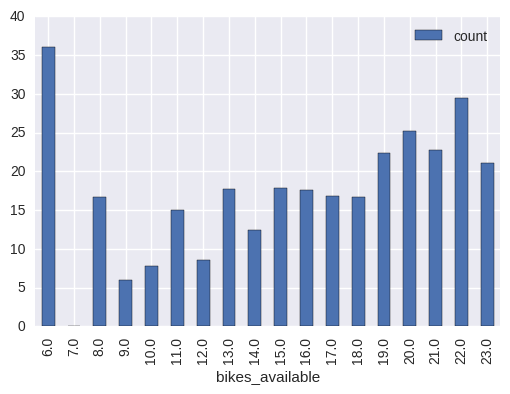

In [21]:
merge_data_trans_am.plot('bikes_available','count',kind='bar')